In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from ElasticNetReg import ElasticNet

In [307]:
df = pd.DataFrame(fetch_california_housing().data, columns=fetch_california_housing().feature_names)
df['Target'] = fetch_california_housing().target

In [309]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


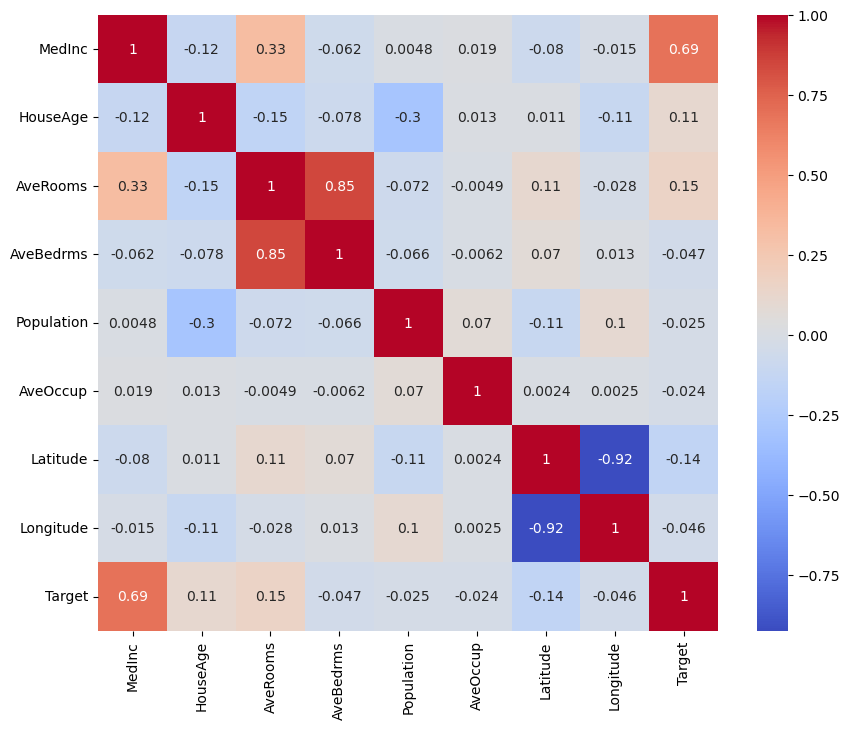

In [311]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [313]:
x = df.drop('Target', axis=1)
y = df['Target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [315]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [317]:
en = ElasticNet(alpha=0.1, l1_ratio=0.5, learn_rate=0.01, max_iters=2500)
en.fit(x_train, y_train)


Iteration 0, Loss: 5.5307
Iteration 100, Loss: 1.3758
Iteration 200, Loss: 0.8059
Iteration 300, Loss: 0.7236
Iteration 400, Loss: 0.7100
Iteration 500, Loss: 0.7068
Iteration 600, Loss: 0.7055
Iteration 700, Loss: 0.7047
Iteration 800, Loss: 0.7041
Iteration 900, Loss: 0.7035
Iteration 1000, Loss: 0.7030
Iteration 1100, Loss: 0.7027
Iteration 1200, Loss: 0.7024
Iteration 1300, Loss: 0.7020
Iteration 1400, Loss: 0.7018
Iteration 1500, Loss: 0.7015
Iteration 1600, Loss: 0.7013
Iteration 1700, Loss: 0.7011
Iteration 1800, Loss: 0.7010
Iteration 1900, Loss: 0.7009
Iteration 2000, Loss: 0.7007
Iteration 2100, Loss: 0.7006
Iteration 2200, Loss: 0.7005
Iteration 2300, Loss: 0.7004
Iteration 2400, Loss: 0.7003


In [319]:
y_train_pred = en.predict(x_train)
y_test_pred = en.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.6284
Test MSE: 0.6369


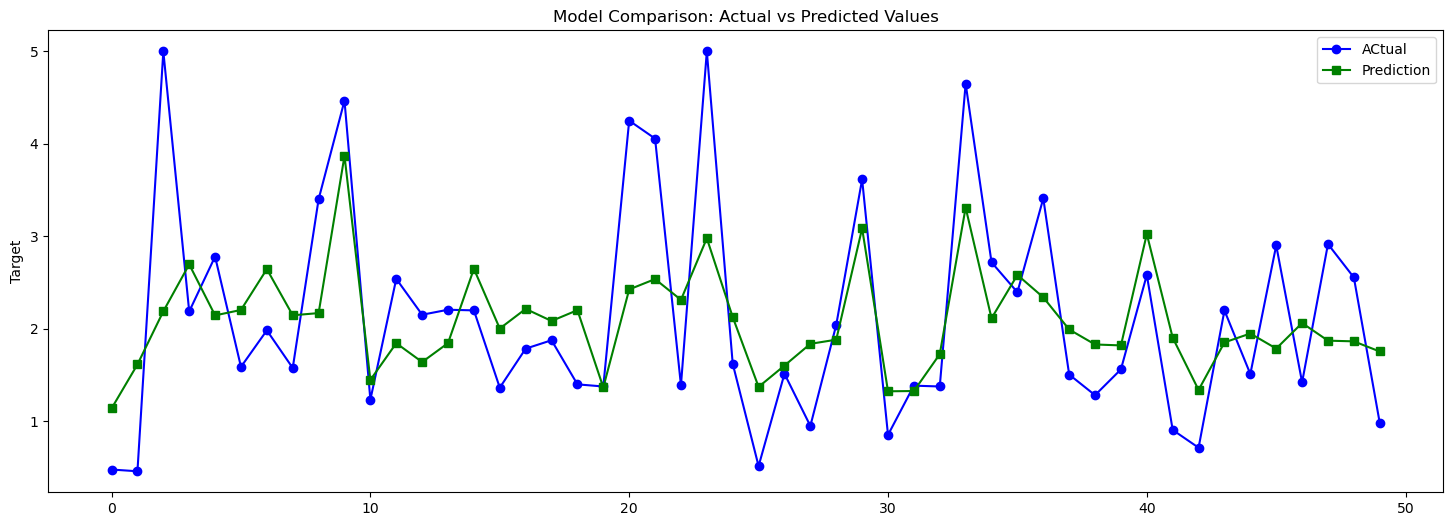

In [321]:
plt.figure(figsize=(18, 6))
plt.plot(y_test[:50].values, label='ACtual', marker='o', color='blue')
plt.plot(y_test_pred[:50], label='Prediction', marker='s', color='green')
plt.title('Model Comparison: Actual vs Predicted Values')
plt.ylabel('Target')
plt.legend()
plt.show()

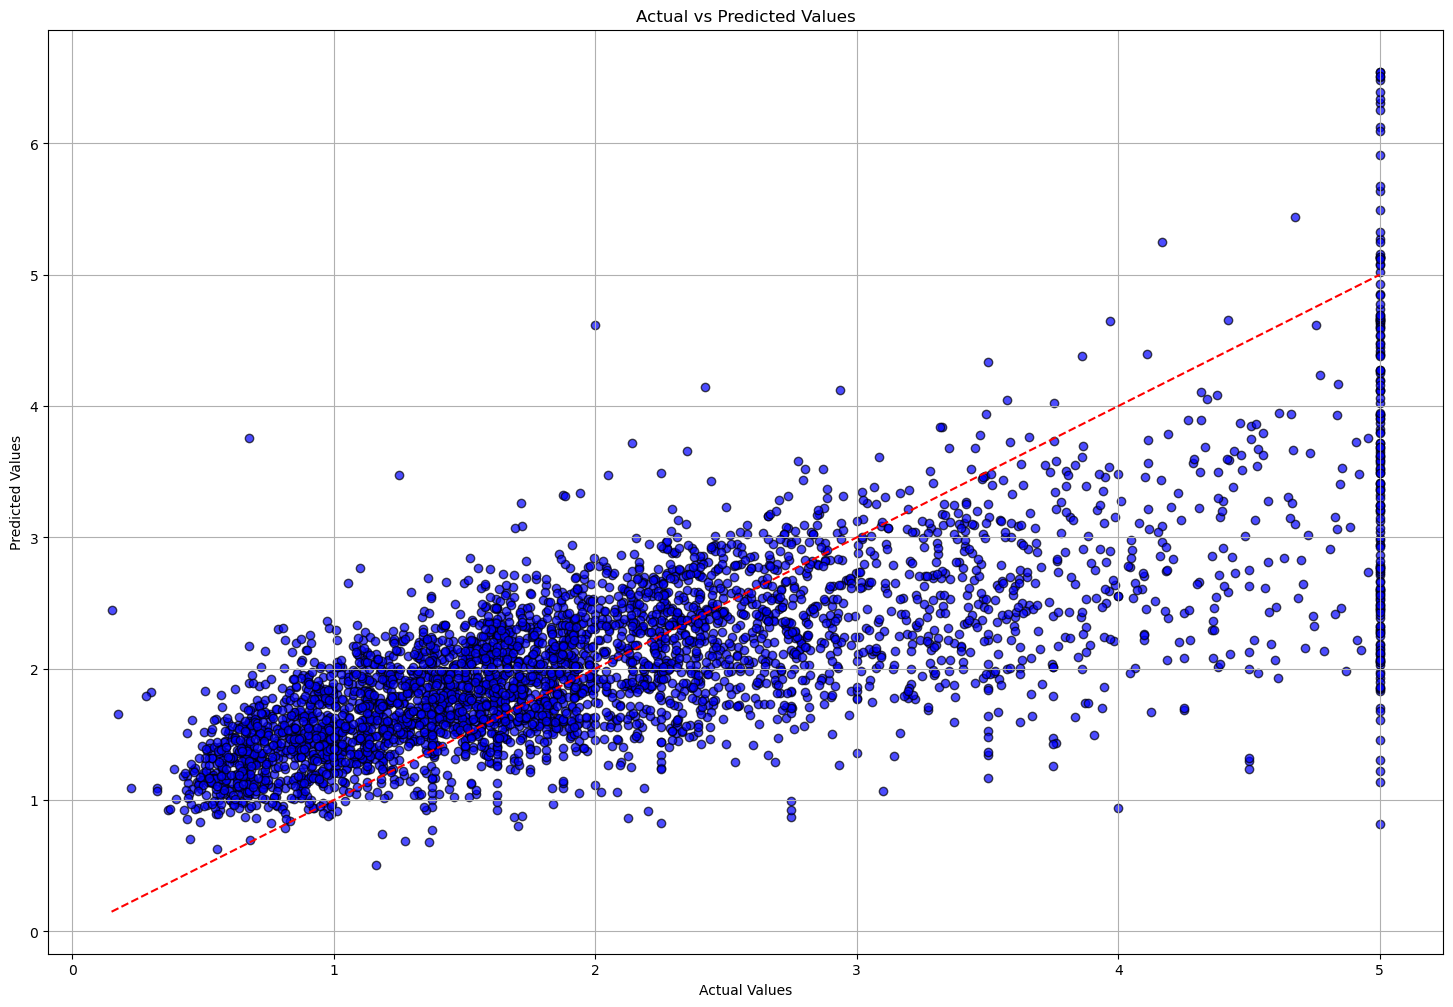

In [323]:
plt.figure(figsize=(18, 12))
plt.scatter(y_test, y_test_pred, color='blue', edgecolors='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()